#1. 데이터 전처리

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import pandas as pd

data = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/DataMining/data/health_data.csv", encoding = 'utf-8')
data.head()

,기준년도,가입자일련번호,시도코드,성별코드,연령대코드(5세단위),신장(5Cm단위),체중(5Kg 단위),허리둘레,시력(좌),시력(우),...,혈청크레아티닌,(혈청지오티)AST,(혈청지오티)ALT,감마지티피,흡연상태,음주여부,구강검진수검여부,치아우식증유무,치석,데이터공개일자
0,2020,1,36,M,9,165,60,72.1,1.2,1.5,...,1.1,21.0,27.0,21.0,No,No,0,NaN,NaN,12/29/2021
1,2020,2,27,F,13,150,65,81.0,0.8,0.8,...,0.5,18.0,15.0,15.0,No,No,0,NaN,NaN,12/29/2021
2,2020,3,11,F,12,155,55,70.0,0.6,0.7,...,0.7,27.0,25.0,7.0,No,No,0,NaN,NaN,12/29/2021
3,2020,4,31,M,13,160,70,90.8,1.0,1.0,...,1.2,65.0,97.0,72.0,No,No,1,0.0,0.0,12/29/2021
4,2020,5,41,F,12,155,50,75.2,1.5,1.2,...,0.7,18.0,17.0,14.0,No,No,0,NaN,NaN,12/29/2021


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 31 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   기준년도         10000 non-null  int64  
 1   가입자일련번호      10000 non-null  int64  
 2   시도코드         10000 non-null  int64  
 3   성별코드         10000 non-null  object 
 4   연령대코드(5세단위)  10000 non-null  int64  
 5   신장(5Cm단위)    10000 non-null  int64  
 6   체중(5Kg 단위)   10000 non-null  int64  
 7   허리둘레         10000 non-null  float64
 8   시력(좌)        10000 non-null  float64
 9   시력(우)        10000 non-null  float64
 10  청력(좌)        10000 non-null  int64  
 11  청력(우)        10000 non-null  int64  
 12  수축기혈압        9912 non-null   float64
 13  이완기혈압        9912 non-null   float64
 14  식전혈당(공복혈당)   9912 non-null   float64
 15  총콜레스테롤       4044 non-null   float64
 16  트리글리세라이드     4044 non-null   float64
 17  HDL콜레스테롤     4044 non-null   float64
 18  LDL콜레스테롤     3977 non-null   float64
 19  혈색소  

In [5]:
data['시도코드'] = data['시도코드'].replace([11, 26, 27, 28, 29, 30, 31, 36, 41, 42, 43, 44, 45, 46, 47, 48, 49], ['서울', '부산', '대구', '인천', '광주', '대전', '울산', '세종', '경기', '강원', '충북', '충남', '전북', '전남', '경북', '경남', '제주'])
data['시도코드']

0       세종
1       대구
2       서울
3       울산
4       경기
        ..
9995    충남
9996    충북
9997    전북
9998    대구
9999    전북
Name: 시도코드, Length: 10000, dtype: object

In [6]:
data['성별코드'] = data['성별코드'].replace(['M', 'F'], ['남성', '여성'])
data['성별코드']

0       남성
1       여성
2       여성
3       남성
4       여성
        ..
9995    여성
9996    여성
9997    남성
9998    여성
9999    여성
Name: 성별코드, Length: 10000, dtype: object

#2. 마이닝

##1. BMI 지수

###1-1. BMI지수와 성별/나이의 관계

In [7]:
#BMI지수 계산 : 몸무게(kg)/신장(m)^2
data['BMI지수'] = data['체중(5Kg 단위)'] / ((data['신장(5Cm단위)'] * 0.01) * (data['신장(5Cm단위)'] * 0.01))
data['BMI지수']

0       22.038567
1       28.888889
2       22.892820
3       27.343750
4       20.811655
          ...    
9995    22.892820
9996    21.484375
9997    31.250000
9998    22.892820
9999    29.296875
Name: BMI지수, Length: 10000, dtype: float64

In [8]:
data['BMI'] = 0
data.loc[data['BMI지수'] <= 18.5, 'BMI'] = '저체중'
data.loc[(data['BMI지수'] > 18.5) & (data['BMI지수'] < 23), 'BMI'] = '정상'
data.loc[(data['BMI지수'] >= 23) & (data['BMI지수'] < 25), 'BMI'] = '과체중'
data.loc[data['BMI지수'] >= 25, 'BMI'] = '비만'

In [9]:
import matplotlib.pyplot as plt

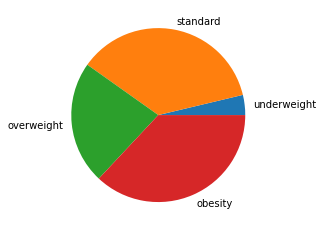

In [10]:
labels = ['underweight', 'standard', 'overweight', 'obesity']
values = [373, 3645, 2285, 3697]

plt.pie(values, labels=labels)
plt.show()

In [11]:
sns.barplot(x="BMI", y="BMI지수", hue="성별코드", data=data)
plt.title("BMI & Sex")
plt.show()

NameError: ignored

BMI와 성별 간에는 큰 연관성이 없는 것으로 판단하였다.